In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hmmlearn import hmm, vhmm
import joblib

# Import data

Chargement des corrdonnées du museau 

In [3]:
X_head = pd.pandas.read_csv("E:/UQAM/Recherche/Thomas/data/head_coords.csv",  names=['Gauche', 'Haut', 'Largeur', 'Longeur'])
X_snout = pd.pandas.read_csv("E:/UQAM/Recherche/Thomas/data/snout_coords.csv",  names=['Gauche', 'Haut', 'Largeur', 'Longeur'])
X_cow = pd.pandas.read_csv("E:/UQAM/Recherche/Thomas/data/cow_coords.csv",  names=['Gauche', 'Haut', 'Largeur', 'Longeur'])

X = np.concatenate([X_head, X_snout, X_cow])
lengths = [len(X_head), len(X_snout), len(X_cow)]

lengths
len(X[0:,0])
X_head

,Gauche,Haut,Largeur,Longeur
0,0.171130,0.391502,0.516889,0.663207
1,0.172891,0.411942,0.520052,0.637912
2,0.174267,0.428778,0.522600,0.617213
3,0.175295,0.442282,0.524578,0.600754
4,0.176014,0.452724,0.526035,0.588182
...,...,...,...,...
1370,0.223776,0.727776,0.387667,0.667878
1371,0.218780,0.710023,0.390090,0.669977
1372,0.216704,0.692295,0.391427,0.670888
1373,0.217767,0.674704,0.391580,0.670472


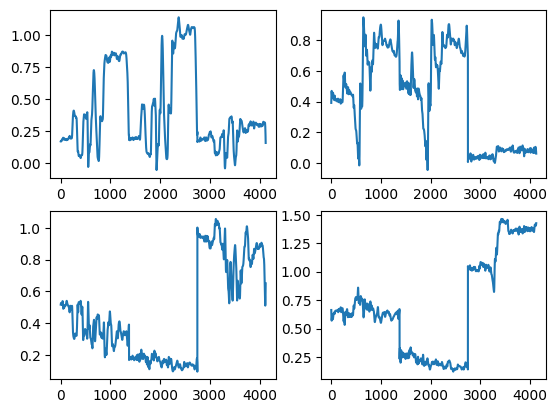

In [4]:
plt.subplot(2,2,1)
plt.plot(range(0,len(X)) , X[0:,0])
plt.subplot(2,2,2)
plt.plot(range(0,len(X)) ,X[0:,1])
plt.subplot(2,2,3)
plt.plot(range(0,len(X)) ,X[0:,2])
plt.subplot(2,2,4)
plt.plot(range(0,len(X)) ,X[0:,3])


# Train model

In [6]:
em_scores = list()
vi_scores = list()
em_models = list()
vi_models = list()
for n_components in range(2, 5):
    for idx in range(10):
        
        em_model = hmm.GaussianHMM(n_components=n_components, random_state=idx,covariance_type = "full", n_iter=50)
        # variational inference
        vi_model = vhmm.VariationalGaussianHMM(n_components=n_components, random_state=idx, covariance_type='full', n_iter=50)
        em_model.fit(X)
        vi_model.fit(X)
        em_models.append(em_model)
        vi_models.append(vi_model)
        em_scores.append(em_model.score(X))
        vi_scores.append(vi_model.score(X))
        ll = em_model.monitor_.history[-1]
        """ print(f"Training EM({n_components}) Final Log Likelihood={ll} "
              f"Iterations={len(vi_model.monitor_.history)} ") """
        # print(f'Converged: {em_model.monitor_.converged}\t\t'f'Score: {scores[-1]}')

# get the best model
em_model = em_models[np.argmax(em_scores)]
em_model = vi_models[np.argmax(vi_scores)]
# print(f'The best model had a score of {max(scores)} and 'f'{em_model.n_components} components')


em_Z = em_model.predict(X)
vi_Z = vi_model.predict(X)
joblib.dump(em_model, 'models/EM/hmm_model_head_snout_cow.pkl')
joblib.dump(vi_model, 'models/Vi/hmm_model_head_snout_cow.pkl')

['models/Vi/hmm_model_head_snout_cow.pkl']

In [5]:
print(em_model.means_)
print(vi_model.means_)
#print(model.covars_)

[[0.23756766 0.46733572 0.41289054 0.66887509]
 [0.98330015 0.78475108 0.13178118 0.1682534 ]
 [0.25689098 0.47918291 0.17421651 0.22792055]
 [0.81395481 0.77818666 0.32705776 0.62095872]]
[[0.17183647 0.49768451 0.17412888 0.25773071]
 [0.34138803 0.48759246 0.17240646 0.20454844]
 [0.99939547 0.7803885  0.13151804 0.16744292]
 [0.45844381 0.58646828 0.38007486 0.6506727 ]]


Text(0.5, 0.98, 'Snout and Head and cow Coordinates EM')

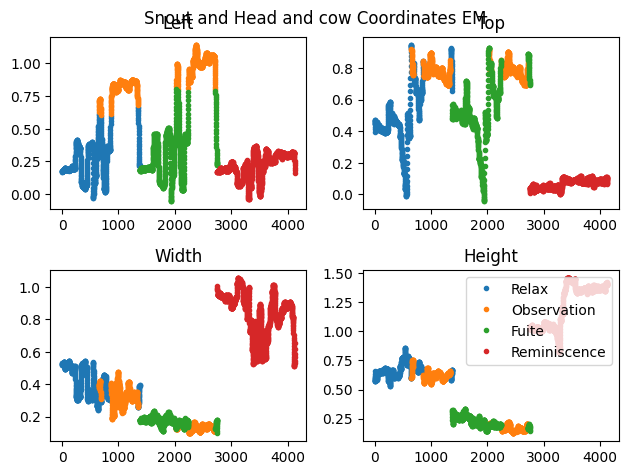

In [8]:
em_states = pd.unique(em_Z)
state_names = ['Relax', 'Observation', 'Fuite', 'Reminiscence']

plt.subplot(2,2,1)
for i in em_states:
    #print(len(X))
    x = np.linspace(1,len(X),len(X))[(em_Z == i)]
    y = X[0:,0][(em_Z == i)]
    plt.plot(x, y, '.')
    plt.title("Left")
plt.subplot(2,2,2)
for i in em_states:
    #print(len(X[1:,0]))
    x = np.linspace(1,len(X),len(X))[(em_Z == i)]
    y = X[0:,1][(em_Z == i)]
    plt.plot(x, y, '.')
    plt.title("Top")
plt.subplot(2,2,3)
for i in em_states:
    x = np.linspace(1,len(X),len(X))[(em_Z == i)]
    y = X[0:,2][(em_Z == i)]
    plt.plot(x, y, '.')
    plt.title("Width")
plt.subplot(2,2,4)
for i in em_states:
    x = np.linspace(1,len(X),len(X))[(em_Z == i)]
    y = X[0:,3][(em_Z == i)]
    plt.plot(x, y, '.')
    plt.title("Height")

plt.tight_layout()
plt.legend(labels=state_names, loc="upper right", ncol=1)
plt.suptitle('Snout and Head and cow Coordinates EM')
# rajouter les etiquettes 

Text(0.5, 0.98, 'Snout and Head and cow Coordinates VI')

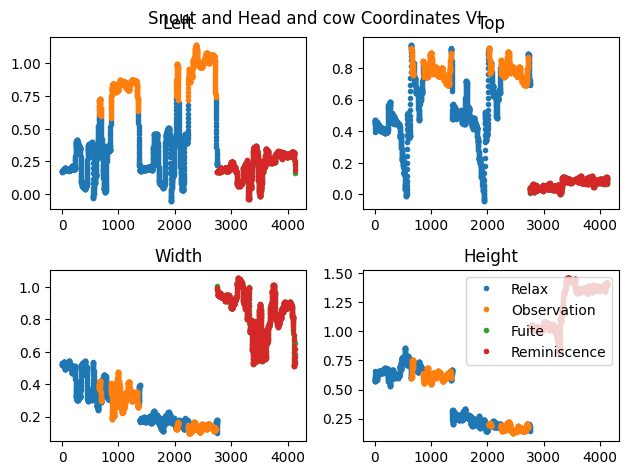

In [9]:
vi_states = pd.unique(vi_Z)

plt.subplot(2,2,1)
for i in vi_states:
    #print(len(X))
    x = np.linspace(1,len(X),len(X))[(vi_Z == i)]
    y = X[0:,0][(vi_Z == i)]
    plt.plot(x, y, '.')
    plt.title('Left')
plt.subplot(2,2,2)
for i in vi_states:
    #print(len(X[1:,0]))
    x = np.linspace(1,len(X),len(X))[(vi_Z == i)]
    y = X[0:,1][(vi_Z == i)]
    plt.plot(x, y, '.')
    plt.title('Top')
plt.subplot(2,2,3)
for i in vi_states:
    x = np.linspace(1,len(X),len(X))[(vi_Z == i)]
    y = X[0:,2][(vi_Z == i)]
    plt.plot(x, y, '.')
    plt.title('Width')
plt.subplot(2,2,4)
for i in vi_states:
    x = np.linspace(1,len(X),len(X))[(vi_Z == i)]
    y = X[0:,3][(vi_Z == i)]
    plt.plot(x, y, '.')
    plt.title('Height')

plt.tight_layout()
plt.legend(labels=state_names, loc="upper right", ncol=1)
plt.suptitle('Snout and Head and cow Coordinates VI')

In [10]:
df=pd.DataFrame({'states':em_Z})
df.to_csv("../INF889E Project/Trained data/EM/head_Snout_cow_coords_hmmstates.csv")
df=pd.DataFrame({'states':vi_Z})
df.to_csv("../INF889E Project/Trained data/VI/head_Snout_cow_coords_hmmstates.csv")